# Data Preparation File

In [1]:
# Load libaries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

color = sns.color_palette()
sns.set_style('darkgrid')
# pd.set_option('max_rows', 10)

print("Done Importing")

Done Importing


In [50]:
event_type = pd.read_csv("data/event_type.csv")
log_feature = pd.read_csv("data/log_feature.csv")
resource_type = pd.read_csv("data/resource_type.csv")
severity_type = pd.read_csv("data/severity_type.csv")
train = pd.read_csv("data/train.csv")
print("Event Type shape: ",event_type.shape )
print("Log Feature shape: ",log_feature.shape )
print("Resource Type shape: ",resource_type.shape )
print("Severity Type shape: ",severity_type.shape )
print("Train shape: ",train.shape )

Event Type shape:  (31170, 2)
Log Feature shape:  (58671, 3)
Resource Type shape:  (21076, 2)
Severity Type shape:  (18552, 2)
Train shape:  (7381, 3)


# '''
how - specifies the type of merge to be performed either left, right, outer, inner or cross
Note: If type is not specified, it is defaulted to inner

how = left means use keys from left dataframe to join and preserve the key order.
This type of join is called Left Join

how = right means use keys from right dataframe to join and preserve the key order.
This type of join is called Right Join

how = outer means use union of keys from both dataframes.
This type of join is called Outer Join.

how = inner, this is a default pandas Join type. Uses intersection of keys from both dataframes to generate a new dataframe.
This type of Join is called Inner Join.

how = cross, this is used to get a dataframe that is  the cartesian product of  two dataframes


left_on = 'id', means column name to join on in the left dataframe

right_on = 'id' means column name to join on in the right dataframe
'''

In [51]:
# merging data files
print("Merged data file info: ")
print()

train_1 = train.merge(severity_type, how = 'left', left_on='id', right_on='id')
# train_1
train_2 = train_1.merge(resource_type, how = 'left', left_on='id', right_on='id')
# train_2
train_3 = train_2.merge(log_feature, how = 'left', left_on='id', right_on='id')
# train_3
train_4 = train_3.merge(event_type, how = 'left', left_on='id', right_on='id')
train_4



Merged data file info: 



,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
...,...,...,...,...,...,...,...,...
61834,15189,location 7,0,severity_type 1,resource_type 8,feature 55,10,event_type 11
61835,15189,location 7,0,severity_type 1,resource_type 8,feature 70,1,event_type 11
61836,17067,location 885,0,severity_type 1,resource_type 8,feature 81,1,event_type 11
61837,17067,location 885,0,severity_type 1,resource_type 8,feature 191,1,event_type 11


# DATA CLEANING

'''
drop_duplicates() is the method used to drop duplicate in pandas. 
This method will return a dataframe that has no dupliacte

subset is used to specify the column for identifying duplicate

keep is used to determine the duplicate to keep either(first, last, false)

'first'this means drop duplicates expect the first occurence
'last' this means drop duplicates expect the last occurence
'False' this means drop all duplicates

inplace is used to determine whether to drop duplicates in place or to return a copy
'''

In [52]:
#dropping the duplicate records

train_4.drop_duplicates(subset= 'id', keep= 'first', inplace = True)
train_4


,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
8,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 35
12,8218,location 931,1,severity_type 1,resource_type 8,feature 80,9,event_type 15
18,14804,location 120,0,severity_type 1,resource_type 2,feature 134,1,event_type 34
...,...,...,...,...,...,...,...,...
61824,870,location 167,0,severity_type 2,resource_type 2,feature 232,1,event_type 34
61828,18068,location 106,0,severity_type 1,resource_type 2,feature 219,1,event_type 20
61830,14111,location 1086,2,severity_type 2,resource_type 8,feature 82,21,event_type 15
61832,15189,location 7,0,severity_type 1,resource_type 8,feature 191,3,event_type 11


In [53]:
'''
.info() will return:
- datatype of each of the column
- return the count of non-null
- number of rows and columns

The below result shows that there are 7381 rows and 8 columns with no null values
'''

print("Train_4 info: ")
print(train_4.info())
print()

print("Check for na values:")
print(train_4.isna().sum())
print()

print("Check for null values:")
print(train_4.isnull().sum())

Train_4 info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 0 to 61836
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
 3   severity_type   7381 non-null   object
 4   resource_type   7381 non-null   object
 5   log_feature     7381 non-null   object
 6   volume          7381 non-null   int64 
 7   event_type      7381 non-null   object
dtypes: int64(3), object(5)
memory usage: 519.0+ KB
None

Check for na values:
id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

Check for null values:
id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dt

In [54]:
# save clean merged file
train_4.to_csv('df_merged.csv', index=False)

# DATA TRANSFORMATION

LABEL ENCODING

In this encoding, each category is assigned a value from 1 through N (here N is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes

In [7]:
# Label encoding
for col in train_4.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    train_4[col] = encoder.fit_transform(train_4[col])

train_4

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,131,1,1,2,143,19,22
4,9320,850,0,1,2,146,200,22
8,14394,163,1,1,2,88,1,23
12,8218,870,1,0,8,211,9,5
18,14804,134,0,0,2,21,1,22
...,...,...,...,...,...,...,...,...
61824,870,177,0,1,2,98,1,22
61828,18068,58,0,0,2,85,1,8
61830,14111,86,2,1,8,213,21,5
61832,15189,656,0,0,8,63,3,1


In [8]:
# Checking encoded columns
print("Train_4 info: ")
print(train_4.info())
print()

print("Check for na values:")
print(train_4.isna().sum())
print()

print("Check for null values:")
print(train_4.isnull().sum())

Train_4 info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 0 to 61836
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              7381 non-null   int64
 1   location        7381 non-null   int32
 2   fault_severity  7381 non-null   int64
 3   severity_type   7381 non-null   int32
 4   resource_type   7381 non-null   int32
 5   log_feature     7381 non-null   int32
 6   volume          7381 non-null   int64
 7   event_type      7381 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 374.8 KB
None

Check for na values:
id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

Check for null values:
id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64


In [9]:
train_4.describe()

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
count,7381.000000,7381.000000,7381.00000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,9264.649099,474.316759,0.45021,0.657770,5.135077,130.233031,8.580409,11.937000
std,5349.290176,286.084285,0.66656,0.760966,2.963699,58.147892,23.539402,10.822876
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4647.000000,182.000000,0.00000,0.000000,2.000000,85.000000,1.000000,1.000000
50%,9222.000000,481.000000,0.00000,1.000000,7.000000,138.000000,2.000000,5.000000
75%,13885.000000,739.000000,1.00000,1.000000,8.000000,189.000000,7.000000,22.000000
max,18550.000000,928.000000,2.00000,4.000000,9.000000,222.000000,636.000000,44.000000


# Feature Selection

This is a process of selecting a subset of relevant features to use in machine learning model building, either automatically or manually

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# features(X) = ['location', 'severity_type', 'resource_type', 'log_feature', 'event_type', 'volume']
X = train_4.iloc[:,[1,3,4,5,6,7]]
y = train_4.iloc[:,2]
print()
chi2_features = SelectKBest(score_func=chi2, k=4)
X_Kbest_features = chi2_features.fit_transform(X, y)
print("Original feature number: ", X.shape[1])
print('Reduced feature number: ', X_Kbest_features.shape[1])
print("Best features are: ")
print(X.iloc[:,[0,3,4,5]])



Original feature number:  6
Reduced feature number:  4
Best features are: 
       location  log_feature  volume  event_type
0           131          143      19          22
4           850          146     200          22
8           163           88       1          23
12          870          211       9           5
18          134           21       1          22
...         ...          ...     ...         ...
61824       177           98       1          22
61828        58           85       1           8
61830        86          213      21           5
61832       656           63       3           1
61836       825          212       1           1

[7381 rows x 4 columns]


In [11]:
train_4.head(5)


,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,131,1,1,2,143,19,22
4,9320,850,0,1,2,146,200,22
8,14394,163,1,1,2,88,1,23
12,8218,870,1,0,8,211,9,5
18,14804,134,0,0,2,21,1,22


In [12]:
# Drop non best features
print("shape before dropping columns is: ", train_4.shape)

train_4.drop(['severity_type', 'resource_type', 'id'], axis='columns', inplace=True)

# Examine shape after dropping columns
print("shape after dropping columns is: ", train_4.shape)
print(train_4)

shape before dropping columns is:  (7381, 8)
shape after dropping columns is:  (7381, 5)
       location  fault_severity  log_feature  volume  event_type
0           131               1          143      19          22
4           850               0          146     200          22
8           163               1           88       1          23
12          870               1          211       9           5
18          134               0           21       1          22
...         ...             ...          ...     ...         ...
61824       177               0           98       1          22
61828        58               0           85       1           8
61830        86               2          213      21           5
61832       656               0           63       3           1
61836       825               0          212       1           1

[7381 rows x 5 columns]


SAMPLING

In [13]:
# Spliting train_4 into target(y) and features(X)
y = train_4.iloc[:,1]
X = train_4.iloc[:,[0,2,3,4]]
print("Target is: ")
print(y)
print("Features are: ")
print(X)


Target is: 
0        1
4        0
8        1
12       1
18       0
        ..
61824    0
61828    0
61830    2
61832    0
61836    0
Name: fault_severity, Length: 7381, dtype: int64
Features are: 
       location  log_feature  volume  event_type
0           131          143      19          22
4           850          146     200          22
8           163           88       1          23
12          870          211       9           5
18          134           21       1          22
...         ...          ...     ...         ...
61824       177           98       1          22
61828        58           85       1           8
61830        86          213      21           5
61832       656           63       3           1
61836       825          212       1           1

[7381 rows x 4 columns]


Sampling

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [16]:
#Training data
X_train.shape


(4428, 4)

In [17]:
X_val.shape


(1476, 4)

In [18]:
X_test.shape


(1477, 4)

Outlier Detection

In [20]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 3, eps = 3)
clusters = outlier_detection.fit_predict(X_train)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
print("Total number of outliers identified is: ",TotalOutliers)

Total number of outliers identified is:  2040


In [21]:
# select all rows that are not outliers and update the X_train and y_train.
mask = clusters != -1
X1_train, y1_train = X_train[mask], y_train[mask]

# summarize the shape of the updated training dataset
print(X1_train.shape, y1_train.shape)
X1_train.head(5)

(2388, 4) (2388,)


,location,log_feature,volume,event_type
24128,775,213,33,5
16400,469,143,7,23
20729,749,64,8,1
33353,137,101,5,22
11752,283,93,1,23


# Data Balancing

In [23]:
y1_train.value_counts()

0    1684
1     542
2     162
Name: fault_severity, dtype: int64

C:\Users\chrisbol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


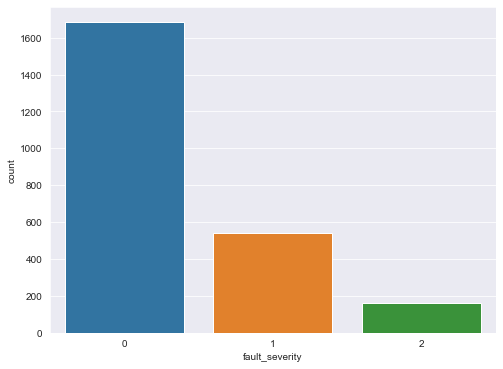

C:\Users\chrisbol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


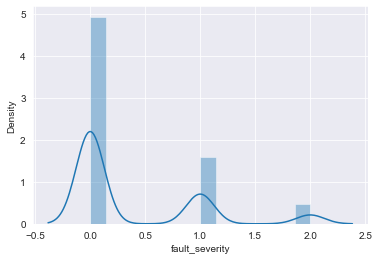

In [24]:
#Show distribution of the  fault_severity
plt.figure(figsize=(8,6))
sns.countplot(y1_train)
plt.show()

print()

#Show distribution of the  fault_severity
sns.distplot(y1_train)
plt.show()

In [27]:
#Concatenate y1_train and X1_train to apply balancing, we would seperate them later again.
df = pd.concat([y1_train, X1_train], axis=1)
df.head(5)

,fault_severity,location,log_feature,volume,event_type
24128,2,775,213,33,5
16400,0,469,143,7,23
20729,0,749,64,8,1
33353,0,137,101,5,22
11752,0,283,93,1,23


Apply Up Sampling

In [28]:
from sklearn.utils import resample

df_majority = df[df.fault_severity == 0]
df_minority = df[df.fault_severity == 1]
df_minority_2 =  df[df.fault_severity == 2]

# upsample minority class fault = 1
df_minority_1_upsampled = resample(df_minority,
                                  replace=True,
                                  n_samples=1684,
                                  random_state=123)

# upsample minority class fault = 2
df_minority_2_upsampled = resample(df_minority_2,
                                  replace=True,
                                  n_samples=1684,
                                  random_state=123)

# combine minority class fault_1 anf fault_2 with majority class
df_upsampled = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled])

# display new class counts
print("upsampled target is: ")
print(df_upsampled.fault_severity.value_counts())

# show statistics 
print()
print("Upsampled Statistics: ")
print(df_upsampled.describe())

upsampled target is: 
2    1684
1    1684
0    1684
Name: fault_severity, dtype: int64

Upsampled Statistics: 
       fault_severity     location  log_feature       volume   event_type
count     5052.000000  5052.000000  5052.000000  5052.000000  5052.000000
mean         1.000000   479.634204   139.320467     5.109660    10.177949
std          0.816577   302.977530    58.471645     6.801616     9.843530
min          0.000000     2.000000    19.000000     1.000000     0.000000
25%          0.000000   141.000000    74.000000     1.000000     1.000000
50%          1.000000   569.000000   143.000000     2.000000     5.000000
75%          2.000000   752.000000   202.000000     6.000000    22.000000
max          2.000000   928.000000   218.000000    74.000000    40.000000


<AxesSubplot:xlabel='fault_severity', ylabel='count'>

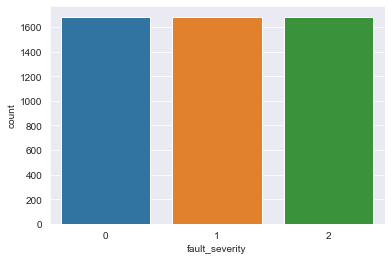

In [102]:
#Show distribution of the class on whole dataset
sns.countplot(x= 'fault_severity', data=df_upsampled)

In [29]:
# check upsampled dataframe
print("Upsampled shape is: ", df_upsampled.shape )
print()
print("Upsampled shape datatype is: ", df_upsampled.dtypes )
print()
print("Check for missing values: ", df_upsampled.isnull().sum())
print()

df_upsampled.tail(5)

# save Upsampled Data set
df_upsampled.to_csv('df_upsampled.csv', index=False)

Upsampled shape is:  (5052, 5)

Upsampled shape datatype is:  fault_severity    int64
location          int32
log_feature       int32
volume            int64
event_type        int32
dtype: object

Check for missing values:  fault_severity    0
location          0
log_feature       0
volume            0
event_type        0
dtype: int64



# Split the new dataframe

In [30]:
# Split the new dataframe
y = df_upsampled.iloc[:,0]
X = df_upsampled.iloc[:,[1,2,3,4]]

print("target is: ")
print(y)

target is: 
16400    0
20729    0
33353    0
11752    0
7635     0
        ..
42727    2
32922    2
59014    2
458      2
14930    2
Name: fault_severity, Length: 5052, dtype: int64


# Without Stratification

In [31]:
# Sampling upsampled dataframe without Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [32]:
print("Train shape is: ", X_train.shape)
print("Val shape is: ", X_val.shape)
print("Test shape is: ", X_test.shape)
X_val

Train shape is:  (3030, 4)
Val shape is:  (1011, 4)
Test shape is:  (1011, 4)


,location,log_feature,volume,event_type
23709,775,74,6,5
38286,361,93,1,22
1743,159,138,1,23
21096,282,143,1,23
38844,680,189,1,1
...,...,...,...,...
16971,42,74,6,5
42794,323,132,1,23
16103,658,21,1,8
49096,159,98,3,22


Logistic Regression

Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred

array([2, 1, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
#  compare accuracy of the actual with the predicted
print("Test_score : ", accuracy_score(y_val, y_pred)) 

Test_score :  0.8654797230464887


Confusion Matrix is a performance measurement for machine learning classification where output can be two or more classes.

In [36]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

Confusion Matrix
[[254  76  23]
 [ 19 285  10]
 [  4   4 336]]


In [37]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_val, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       353
           1       0.78      0.91      0.84       314
           2       0.91      0.98      0.94       344

    accuracy                           0.87      1011
   macro avg       0.87      0.87      0.86      1011
weighted avg       0.87      0.87      0.86      1011



# Modelling

#  evaluate a suite of different machine learning models on the dataset

In [38]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [39]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [40]:
# evaluate a given model using cross-validation
#The evaluate_model() function below takes a model instance and returns a list of scores from three repeats of stratified 10-fold cross-validation.

def evaluate_model(model,X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.54 (0.03)
>knn 0.78 (0.02)
>cart 0.86 (0.02)
>svm 0.49 (0.03)
>bayes 0.53 (0.03)


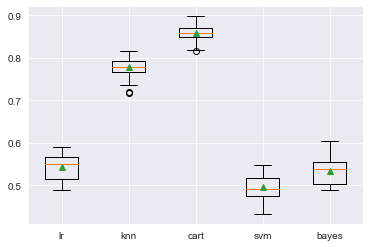

In [41]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [43]:
print("Decision Tree Classifier performed better with a mean accuracy of: 86%")

Decision Tree Classifier performed better with a mean accuracy of: 86%


IMPLEMENTING ENSEMBLE

In [42]:
from sklearn.ensemble import StackingClassifier

In [44]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [45]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

>lr 0.54 (0.03)
>knn 0.78 (0.02)
>cart 0.86 (0.02)
>svm 0.49 (0.03)
>bayes 0.53 (0.03)
>stacking 0.86 (0.02)


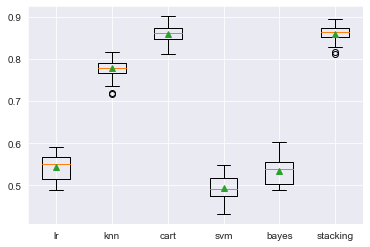


Decision Tree and Stacking model performed better with a mean accuracy of 86%


In [46]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

print()
print("Decision Tree and Stacking model performed better with a mean accuracy of 86%")

# MAKE A PREDICTION WITH DECISION TREE CLASSIFIER

In [47]:
cart = DecisionTreeClassifier()
cart.fit(X, y)

# make a prediction for one example
data = [[86,213,21,5]]
predicted_fault = cart.predict(data)
print('Predicted Class: %d' % (predicted_fault))
if predicted_fault == 0:
    print("This implies that the fault severity is low")
elif predicted_fault == 1:
    print("This implies that the fault severity is medium")
elif predicted_fault == 2:
    print("This implies that the fault severity is high")
else:
    print("Fault can not be categorised")

Predicted Class: 2
This implies that the fault severity is high


# Save the Model using Pickle

In [48]:
# save the model to disk
import pickle

filename = 'faultSeverity_classifierModel.sav'
pickle.dump(cart, open(filename, 'wb'))

Save the Pickled Model on the Test Data

In [49]:
# load the model from disk
loadedModel = pickle.load(open(filename, 'rb'))
result = loadedModel.score(X_test, y_test)
print("Estimated accuracy of the model on unseen data is: ", result)

Estimated accuracy of the model on unseen data is:  0.9703264094955489
